In [362]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import os
import seaborn as sns
import networkx as nx

# Eurovision Song Contest (ESC) Analysis

## Data Familiarization

In [338]:
# Get current directory
cwd = os.getcwd()
print(cwd)

c:\Users\mate1\OneDrive\Escritorio\Repository\Eurovision_Contest_Analysis


In [339]:
# Load data
df_votes = pd.read_csv('Data/votes.csv')
a = df_votes[df_votes['year'] == 2016]
a

,year,round,from_country_id,to_country_id,from_country,to_country,total_points,tele_points,jury_points
39613,2016,final,al,ua,al,ua,6,6.0,0.0
39614,2016,final,al,au,al,au,24,12.0,12.0
39615,2016,final,al,ru,al,ru,14,7.0,7.0
39616,2016,final,al,bg,al,bg,12,8.0,4.0
39617,2016,final,al,se,al,se,3,3.0,0.0
...,...,...,...,...,...,...,...,...,...
41456,2016,semi-final-2,gb,si,gb,si,0,0.0,0.0
41457,2016,semi-final-2,gb,ie,gb,ie,9,7.0,2.0
41458,2016,semi-final-2,gb,al,gb,al,0,0.0,0.0
41459,2016,semi-final-2,gb,dk,gb,dk,0,0.0,0.0


In [340]:
# Get the initial and last years of the data
initial_year = df_votes['year'].min()
final_year = df_votes['year'].max()
print('Initial year:', initial_year)
print('Final year:', final_year)

Initial year: 1957
Final year: 2023


### Data Cleaning

In this work we are only interested in the final round.

In [341]:
# Get only the final round
df_final_round = df_votes[df_votes['round'] == 'final']

In [342]:
# Remove giving 0 points
df_final_round = df_final_round[df_final_round['total_points'] > 0]
df_final_round

,year,round,from_country_id,to_country_id,from_country,to_country,total_points,tele_points,jury_points
0,1957,final,at,nl,at,nl,6,NaN,NaN
3,1957,final,at,lu,at,lu,3,NaN,NaN
6,1957,final,at,gb,at,gb,1,NaN,NaN
10,1957,final,be,nl,be,nl,5,NaN,NaN
11,1957,final,be,fr,be,fr,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...
51340,2023,final,wld,hr,wld,hr,3,3.0,NaN
51341,2023,final,wld,am,wld,am,8,8.0,NaN
51343,2023,final,wld,fr,wld,fr,1,1.0,NaN
51344,2023,final,wld,es,wld,es,2,2.0,NaN


In [343]:
# Get the total number of countries
total_countries = df_final_round['from_country_id']
total_countries = np.array(total_countries)
total_countries = np.unique(total_countries)
print('Total countries:', total_countries)
print('Number of countries:', len(total_countries))

Total countries: ['ad' 'al' 'am' 'at' 'au' 'az' 'ba' 'be' 'bg' 'by' 'ch' 'cs' 'cy' 'cz'
 'de' 'dk' 'ee' 'es' 'fi' 'fr' 'gb' 'ge' 'gr' 'hr' 'hu' 'ie' 'il' 'is'
 'it' 'lt' 'lu' 'lv' 'ma' 'mc' 'md' 'me' 'mk' 'mt' 'nl' 'no' 'pl' 'pt'
 'ro' 'rs' 'ru' 'se' 'si' 'sk' 'sm' 'tr' 'ua' 'wld' 'yu']
Number of countries: 53


In [344]:
# # Broadcast the Yugoslavia points to their actual countries
# broadcast = {
#     'yu': ['ba', 'hr', 'mk', 'rs', 'si'],
#     'cs': ['rs', 'me']
# }

# df_final_round['from_country_id'] = df_final_round['from_country_id'].apply(lambda x: broadcast[x] if x in broadcast.keys() else x)
# df_final_round['to_country_id'] = df_final_round['to_country_id'].apply(lambda x: broadcast[x] if x in broadcast.keys() else x)
# df_final_round.explode('from_country_id').explode('to_country_id')

In [345]:
# Dictionary with the real name of the countries
country_id_to_name = {
    'ad': 'Andorra',
    'al': 'Albania',
    'am': 'Armenia',
    'at': 'Austria',
    'au': 'Australia',
    'az': 'Azerbaijan',
    'ba': 'Bosnia and Herzegovina',
    'be': 'Belgium',
    'bg': 'Bulgaria',
    'by': 'Belarus',
    'ch': 'Switzerland',
    'cs': 'Serbia and Montenegro',  # Historical ID
    'cy': 'Cyprus',
    'cz': 'Czech Republic',
    'de': 'Germany',
    'dk': 'Denmark',
    'ee': 'Estonia',
    'es': 'Spain',
    'fi': 'Finland',
    'fr': 'France',
    'gb': 'United Kingdom',
    'ge': 'Georgia',
    'gr': 'Greece',
    'hr': 'Croatia',
    'hu': 'Hungary',
    'ie': 'Ireland',
    'il': 'Israel',
    'is': 'Iceland',
    'it': 'Italy',
    'lt': 'Lithuania',
    'lu': 'Luxembourg',
    'lv': 'Latvia',
    'ma': 'Morocco',
    'mc': 'Monaco',
    'md': 'Moldova',
    'me': 'Montenegro',
    'mk': 'North Macedonia',
    'mt': 'Malta',
    'nl': 'Netherlands',
    'no': 'Norway',
    'pl': 'Poland',
    'pt': 'Portugal',
    'ro': 'Romania',
    'rs': 'Serbia',
    'ru': 'Russia',
    'se': 'Sweden',
    'si': 'Slovenia',
    'sk': 'Slovakia',
    'sm': 'San Marino',
    'tr': 'Turkey',
    'ua': 'Ukraine',
    'wld': 'World',  # Possible placeholder for aggregated data
    'yu': 'Yugoslavia'  # Historical ID
}

In [346]:
df_final_round['from_country'] = df_final_round['from_country'].map(country_id_to_name)
df_final_round['to_country'] = df_final_round['to_country'].map(country_id_to_name)
df_final_round

,year,round,from_country_id,to_country_id,from_country,to_country,total_points,tele_points,jury_points
0,1957,final,at,nl,Austria,Netherlands,6,NaN,NaN
3,1957,final,at,lu,Austria,Luxembourg,3,NaN,NaN
6,1957,final,at,gb,Austria,United Kingdom,1,NaN,NaN
10,1957,final,be,nl,Belgium,Netherlands,5,NaN,NaN
11,1957,final,be,fr,Belgium,France,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...
51340,2023,final,wld,hr,World,Croatia,3,3.0,NaN
51341,2023,final,wld,am,World,Armenia,8,8.0,NaN
51343,2023,final,wld,fr,World,France,1,1.0,NaN
51344,2023,final,wld,es,World,Spain,2,2.0,NaN


### Number of Participations

In [347]:
# Get the number of participations of each country

# Combine all country IDs into a single column with the corresponding year
participations = pd.concat([
    df_final_round[['year', 'from_country']].rename(columns={'from_country': 'country'}),
    df_final_round[['year', 'to_country']].rename(columns={'to_country': 'country'}),
])

# Explode the lists into individual rows
participations = participations.explode('country')

# Drop duplicates to ensure each country-year combination is only counted once
participations = participations.drop_duplicates()

# Count the number of unique years each country participated
participation_counts = participations.groupby('country')['year'].nunique()

# Convert the result to a DataFrame
participation_counts = participation_counts.reset_index()
participation_counts.columns = ['country', 'participation_count']

# Change the country IDs to their full names
# participation_counts['country_name'] = participation_counts['country_id'].map(country_id_to_name)

# Represent in a table the number of participations of each country with their complete name
participation_counts = participation_counts.sort_values('participation_count', ascending=False)
participation_counts[['country', 'participation_count']]


,country,participation_count
50,United Kingdom,65
18,Germany,65
16,France,64
7,Belgium,63
33,Netherlands,62
47,Switzerland,62
46,Sweden,62
45,Spain,62
35,Norway,61
22,Ireland,56


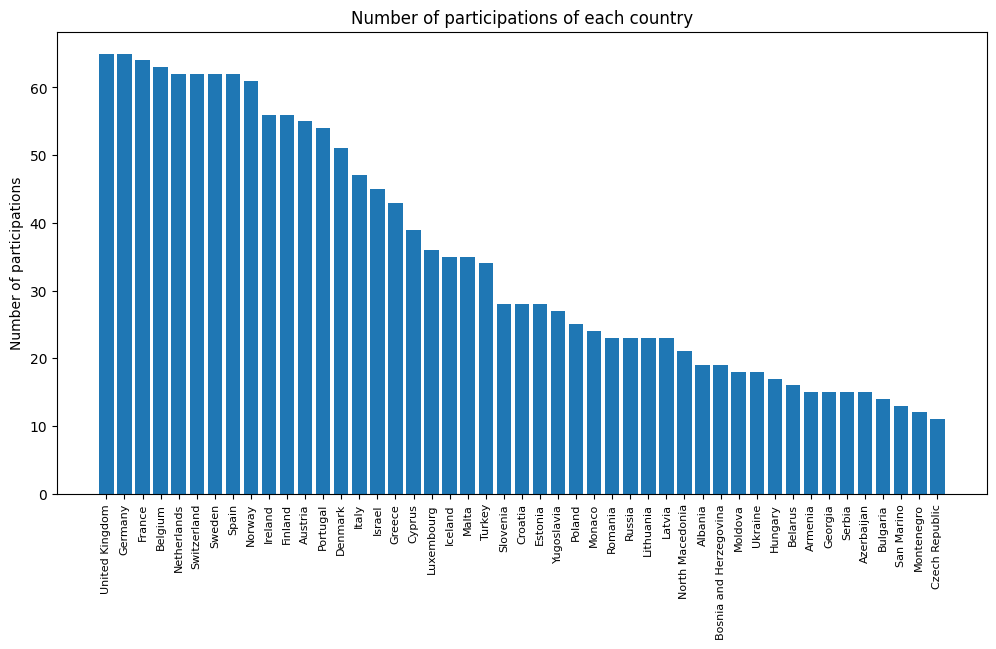

In [348]:
# Plot the number of participations of each country with a minimum of 10 participations
x = participation_counts[participation_counts['participation_count'] >= 10]

plt.figure(figsize=(12, 6))
plt.bar(x['country'], x['participation_count'])
plt.xticks(rotation=90, fontsize=8)    
plt.ylabel('Number of participations')
plt.title('Number of participations of each country')
plt.show()

In [349]:
countries = np.array(participation_counts['country'])
print('Countries:', countries)
print('Number of countries:', len(countries))



Countries: ['United Kingdom' 'Germany' 'France' 'Belgium' 'Netherlands' 'Switzerland'
 'Sweden' 'Spain' 'Norway' 'Ireland' 'Finland' 'Austria' 'Portugal'
 'Denmark' 'Italy' 'Israel' 'Greece' 'Cyprus' 'Luxembourg' 'Iceland'
 'Malta' 'Turkey' 'Slovenia' 'Croatia' 'Estonia' 'Yugoslavia' 'Poland'
 'Monaco' 'Romania' 'Russia' 'Lithuania' 'Latvia' 'North Macedonia'
 'Albania' 'Bosnia and Herzegovina' 'Moldova' 'Ukraine' 'Hungary'
 'Belarus' 'Armenia' 'Georgia' 'Serbia' 'Azerbaijan' 'Bulgaria'
 'San Marino' 'Montenegro' 'Czech Republic' 'Australia' 'Slovakia'
 'Andorra' 'Serbia and Montenegro' 'Morocco' 'World']
Number of countries: 53


### Number of wins

In [350]:
win_table = []
# Get the number of wins of each country by adding the points per year
for year in range(initial_year, final_year + 1):
    
    if year ==2020:
        # No eurovision in 2020
        continue
    df_year = df_final_round[df_final_round['year'] == year]
    table = df_year.groupby('to_country')['total_points'].sum().sort_values(ascending=False)

    if year == 1969:
        # The winner of 1969 was France, Spain, the United Kingdom and the Netherlands (all of the considered winners)
        winners = ['France', 'Spain', 'United Kingdom', 'Netherlands']
    elif year == 1991:
        # The winner was Sweden which draws with France
        winner = table.index[1]
    else:
        winner = table.index[0]
    points = table.iloc[0]
    win_table.append(winner)
    # print(year, winner, points)

# Convert the result to a DataFrame
win_table = pd.DataFrame(win_table, columns=['country'])
win_table = win_table['country'].value_counts().reset_index()
win_table.columns = ['country', 'win_count']

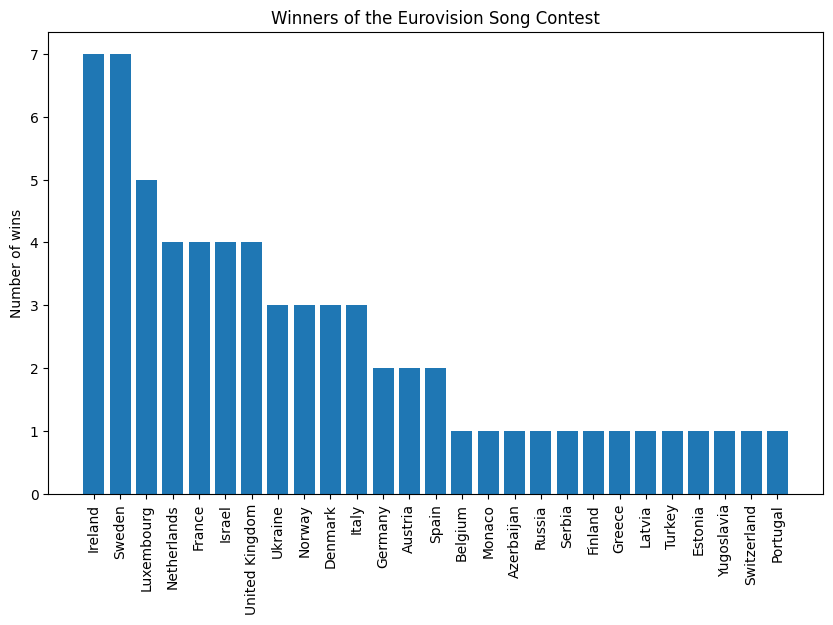

In [351]:

cw = win_table['win_count']
x = win_table['country']

idx_sort = cw.argsort()
cw = cw[idx_sort[::-1]]
x = x[idx_sort[::-1]]

plt.figure(figsize=(10, 6))
plt.bar(x, cw)
plt.xticks(rotation=90)
plt.ylabel('Number of wins')
plt.title('Winners of the Eurovision Song Contest')
plt.show()

In [352]:
# Delete the countries with less than 10 participations
participation_counts = participation_counts[participation_counts['participation_count'] >= 10]

# Update the dataframe
df_final_round = df_final_round[df_final_round['from_country'].isin(participation_counts['country'])]
df_final_round = df_final_round[df_final_round['to_country'].isin(participation_counts['country'])]
df_final_round

,year,round,from_country_id,to_country_id,from_country,to_country,total_points,tele_points,jury_points
0,1957,final,at,nl,Austria,Netherlands,6,NaN,NaN
3,1957,final,at,lu,Austria,Luxembourg,3,NaN,NaN
6,1957,final,at,gb,Austria,United Kingdom,1,NaN,NaN
10,1957,final,be,nl,Belgium,Netherlands,5,NaN,NaN
11,1957,final,be,fr,Belgium,France,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...
51315,2023,final,gb,am,United Kingdom,Armenia,3,0.0,3.0
51318,2023,final,gb,es,United Kingdom,Spain,5,0.0,5.0
51319,2023,final,gb,md,United Kingdom,Moldova,1,1.0,0.0
51320,2023,final,gb,pl,United Kingdom,Poland,8,8.0,0.0


In [353]:
# Up to year 2015 put the total point given by a country to another country also in the jury points
df_final_round.loc[df_final_round['year'] <= 2015, 'jury_points'] = df_final_round.loc[df_final_round['year'] <= 2015]['total_points']
df_final_round

,year,round,from_country_id,to_country_id,from_country,to_country,total_points,tele_points,jury_points
0,1957,final,at,nl,Austria,Netherlands,6,NaN,6.0
3,1957,final,at,lu,Austria,Luxembourg,3,NaN,3.0
6,1957,final,at,gb,Austria,United Kingdom,1,NaN,1.0
10,1957,final,be,nl,Belgium,Netherlands,5,NaN,5.0
11,1957,final,be,fr,Belgium,France,2,NaN,2.0
...,...,...,...,...,...,...,...,...,...
51315,2023,final,gb,am,United Kingdom,Armenia,3,0.0,3.0
51318,2023,final,gb,es,United Kingdom,Spain,5,0.0,5.0
51319,2023,final,gb,md,United Kingdom,Moldova,1,1.0,0.0
51320,2023,final,gb,pl,United Kingdom,Poland,8,8.0,0.0


### Country analyzer

#### One country analyzer

Number of points given by Spain before 1997 and after 1997 + Boxplot of normalized points

In [360]:
# Function to obtain the number of points given for a given country during a time period

def family_points(df_final_round, country_id, initial_year, crop=20):
    
    # Get the number of points given by country_id to each country
    friends = df_final_round.query(f'year >= {initial_year} and from_country=="{country_id}"')
    
    fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12,8))
    gs = axs[1,0].get_gridspec()
    for ax in axs[1,:]:
        ax.remove()
    axbig = fig.add_subplot(gs[1,:])
    
    def normalize(df):
        return df / df.sum()
    
    fig.suptitle(f'Normalized points given by {country_id} to each country since {initial_year}', fontsize=16)
    # fig.tight_layout()


    # Plot the  normalized number of jury points given by country_id to each country
    friends1 = friends.groupby('to_country')['jury_points'].sum().sort_values(ascending=False)
    indices = friends1.index
    indices = indices[:crop]
    friends1 = normalize(friends1)
    friends1 = friends1.reset_index()
    friends1.columns = ['country', 'points']
    friends1 = friends1.head(crop)
    x = friends1['country']
    y = friends1['points']
    axs[0,0].bar(x, y, label='Jury')
    # axs[0,0].set_title(f'Normalized points given by {country_id} to each country')
    axs[0,0].set_xticklabels(x, rotation=90, fontsize=8)
    axs[0,0].set_ylabel('Normalized points')
    axs[0,0].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
    
    
    # Plot the number of televote points given by country_id to each country
    friends2 = friends.groupby('to_country')['tele_points'].sum().sort_values(ascending=False)
    friends2 = friends2 / friends2.sum()
    friends2 = friends2.reset_index()
    friends2.columns = ['country', 'points']
    friends2 = friends2.head(crop)
    x = friends2['country']
    y = friends2['points']
    axs[0,1].bar(x, y, label='Televote', color='orange')
    # axs[0,1].set_title(f'Normalized Points given by {country_id} to each country')
    axs[0,1].set_xticklabels(x, rotation=90, fontsize=8)
    axs[0,1].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
    
    
    # Boxplot of the total points given by country_id to each country though the years
    friends_sorted = friends.groupby('year').apply(lambda x: normalize(x.groupby('to_country')['jury_points'].sum())).reset_index()
    # t = friends_sorted.groupby('to_country').sum().sort_values('jury_points', ascending=False).index
    # t = t[:crop]
    
    sns.boxplot(data=friends_sorted[friends_sorted['to_country'].isin(indices)], x='to_country', y='jury_points', order=indices, ax=axbig, color='skyblue')
    axbig.set_xticklabels(axbig.get_xticklabels(), rotation=90, fontsize=8)
    axbig.set_ylabel('Normalized points')
    axbig.set_title(f'Jury Point distribution though the years')
    axbig.set_xlabel('')
    
    
    plt.subplots_adjust(hspace=0.6)  # Adjust the spacing (increase for more space)

    plt.show()
    
    
    return 


C:\Users\mate1\AppData\Local\Temp\ipykernel_10380\384718967.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0,0].set_xticklabels(x, rotation=90, fontsize=8)
C:\Users\mate1\AppData\Local\Temp\ipykernel_10380\384718967.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0,1].set_xticklabels(x, rotation=90, fontsize=8)
C:\Users\mate1\AppData\Local\Temp\ipykernel_10380\384718967.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axbig.set_xticklabels(axbig.get_xticklabels(), rotation=90, fontsize=8)


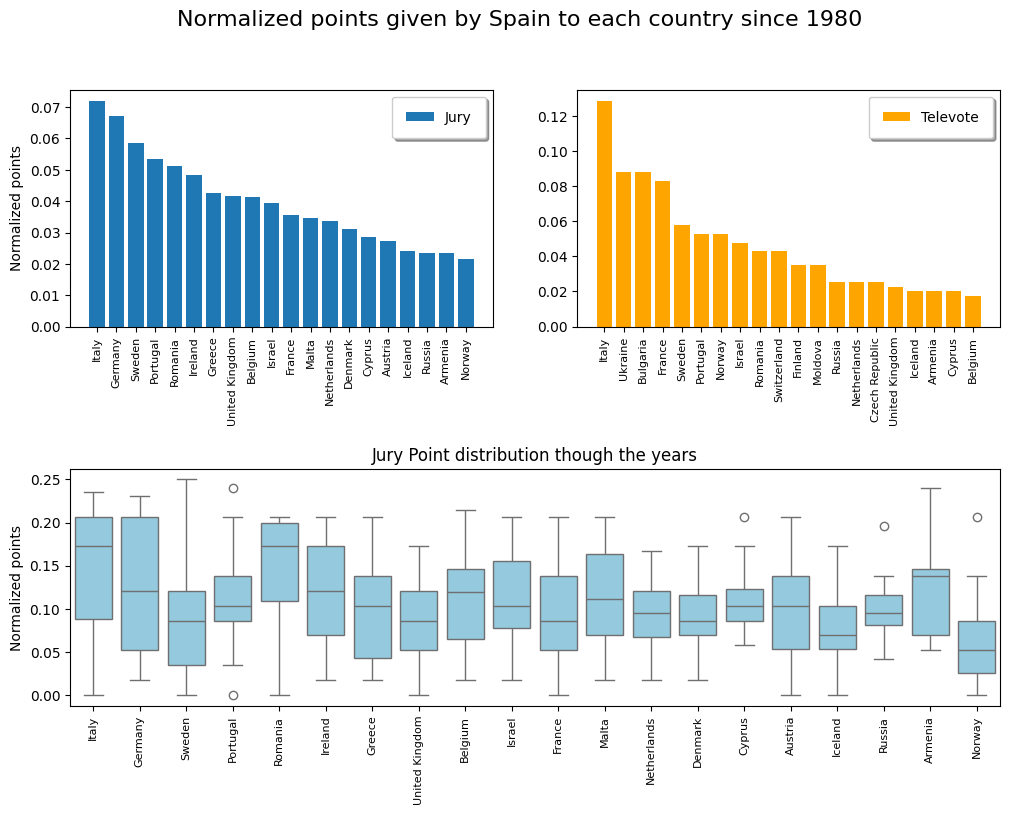

In [361]:
family_points(df_final_round, country_id='Spain', initial_year=1980)

## Analysis

### Network

### Tree diagram of cohesion cluster analysis

In [368]:
# Cluster analysis by applying Ward algorithm and Squared Euclidean distance
from scipy.cluster.hierarchy import dendrogram, linkage

def cluster_analysis(df_final_round, initial_year, final_year):
    
    # Get the number of points given by country_id to each country
    friends = df_final_round.query(f'year >= {initial_year} and year <= {final_year}')
    
    # Get the number of points given by country_id to each country
    friends = friends.groupby(['from_country', 'to_country'])['jury_points'].sum().unstack().fillna(0)
    
    # Normalize the points
    friends = friends.apply(lambda x: x / x.sum(), axis=1)
    
    # Get the top crop countries
    friends = friends.loc[friends.sum(axis=1).sort_values(ascending=False).index]
    
    # Apply the Ward algorithm
    Z = linkage(friends, 'ward')
    
    # Plot the dendrogram
    plt.figure(figsize=(12, 6))
    dendrogram(Z, labels=friends.index, orientation='right', leaf_font_size=8)
    plt.title('Dendrogram of countries based on the points given by each country to each other')
    plt.show()
    
    return

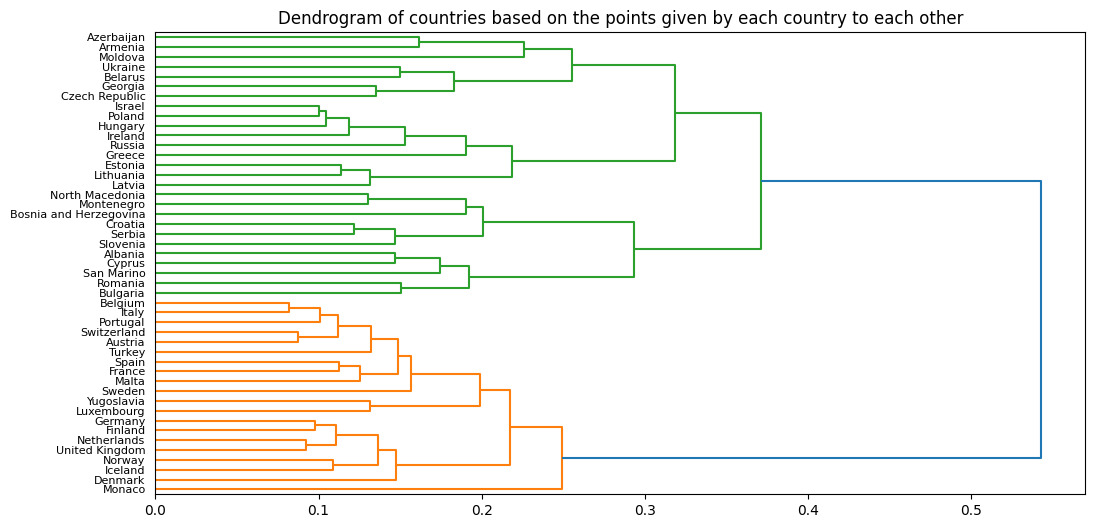

In [369]:
cluster_analysis(df_final_round, initial_year=1980, final_year=2019)

### Study of Bias

### The effect of centrality

### Hypothesis test